In [10]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fitrianamasruroh","key":"a69b24359875a24f9b058aa26fa78f11"}'}

In [11]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [12]:
!kaggle datasets download -d fitrianamasruroh/face-shape5

 92% 97.0M/105M [00:01<00:00, 51.1MB/s]
100% 105M/105M [00:01<00:00, 72.4MB/s] 


In [13]:
!unzip face-shape5.zip

Archive:  face-shape5.zip
  inflating: Face_shape_5/Heart/100_Hearts.jpg  
  inflating: Face_shape_5/Heart/101_Hearts.jpg  
  inflating: Face_shape_5/Heart/102_Hearts.jpg  
  inflating: Face_shape_5/Heart/103_Hearts.jpg  
  inflating: Face_shape_5/Heart/104_Hearts.jpg  
  inflating: Face_shape_5/Heart/105_Hearts.jpg  
  inflating: Face_shape_5/Heart/106_Hearts.jpg  
  inflating: Face_shape_5/Heart/107_Hearts.jpg  
  inflating: Face_shape_5/Heart/108_Hearts.jpg  
  inflating: Face_shape_5/Heart/109_Hearts.jpg  
  inflating: Face_shape_5/Heart/10_Hearts.jpg  
  inflating: Face_shape_5/Heart/110_Hearts.jpg  
  inflating: Face_shape_5/Heart/111_Hearts.jpg  
  inflating: Face_shape_5/Heart/112_Hearts.jpg  
  inflating: Face_shape_5/Heart/113_Hearts.jpg  
  inflating: Face_shape_5/Heart/114_Hearts.jpg  
  inflating: Face_shape_5/Heart/115_Hearts.jpg  
  inflating: Face_shape_5/Heart/116_Hearts.jpg  
  inflating: Face_shape_5/Heart/117_Hearts.jpg  
  inflating: Face_shape_5/Heart/118_Hearts.j

In [14]:
import numpy as np # linear algebra
import pandas as pd  # data processing
import os #  to interact with files using there paths
from sklearn.datasets import load_files

In [15]:
#The path of our data on drive
data_dir =  '/content/Face_shape_5'


In [16]:
#Loading our Data
data = load_files(data_dir)

In [17]:
folders=os.listdir('/content/Face_shape_5')
print(folders)

['Oval', 'Round', 'Oblong', 'Heart', 'Square']


In [18]:
X = np.array(data['filenames'])
y = np.array(data['target'])
labels = np.array(data['target_names'])
 
# How the arrays look like?
print('Data files - ',X)
print('Target labels - ',y)

Data files -  ['/content/Face_shape_5/Round/round (395).jpg'
 '/content/Face_shape_5/Oblong/47_Oblong.jpg'
 '/content/Face_shape_5/Square/square (529).jpg' ...
 '/content/Face_shape_5/Oblong/oblong (564).jpg'
 '/content/Face_shape_5/Oval/oval (641).jpg'
 '/content/Face_shape_5/Oval/oval (757).jpg']
Target labels -  [3 1 4 ... 1 2 2]


In [19]:
# Remove .pyc or .py files
pyc_file_pos = (np.where(file==X) for file in X if file.endswith(('.pyc','.py')))
for pos in pyc_file_pos:
    X = np.delete(X,pos)
    y = np.delete(y,pos)
    
print('Number of training files : ', X.shape[0])
print('Number of training targets : ', y.shape[0])

Number of training files :  4900
Number of training targets :  4900


In [20]:
from keras.preprocessing.image import img_to_array, load_img

def convert_img_to_arr(file_path_list):
    arr = []
    #size=64,64
    img_width, img_height = 224,224
    for file_path in file_path_list:
        img = load_img(file_path, target_size = (img_width, img_height))
        img = img_to_array(img)
        arr.append(img)
        #arr.append(cv2.resize(img,size))
    return arr
 
X = np.array(convert_img_to_arr(X))
print(X.shape) 
print('First training item : ',X[0])

(4900, 224, 224, 3)
First training item :  [[[ 71. 226. 254.]
  [ 71. 226. 254.]
  [ 71. 226. 254.]
  ...
  [ 69. 222. 253.]
  [ 69. 222. 253.]
  [ 70. 223. 254.]]

 [[ 71. 225. 253.]
  [ 72. 226. 254.]
  [ 72. 226. 254.]
  ...
  [ 69. 222. 253.]
  [ 69. 222. 253.]
  [ 70. 223. 254.]]

 [[ 73. 224. 253.]
  [ 73. 224. 253.]
  [ 73. 224. 253.]
  ...
  [ 70. 223. 254.]
  [ 69. 222. 253.]
  [ 70. 223. 254.]]

 ...

 [[ 46. 182. 220.]
  [ 40. 180. 216.]
  [ 43. 183. 219.]
  ...
  [ 31.  65. 162.]
  [ 33.  66. 163.]
  [ 33.  66. 163.]]

 [[ 46. 180. 218.]
  [ 41. 179. 216.]
  [ 44. 182. 221.]
  ...
  [ 36.  66. 162.]
  [ 38.  66. 165.]
  [ 38.  66. 165.]]

 [[ 49. 180. 222.]
  [ 45. 181. 221.]
  [ 46. 184. 223.]
  ...
  [ 40.  66. 163.]
  [ 42.  67. 167.]
  [ 43.  67. 167.]]]


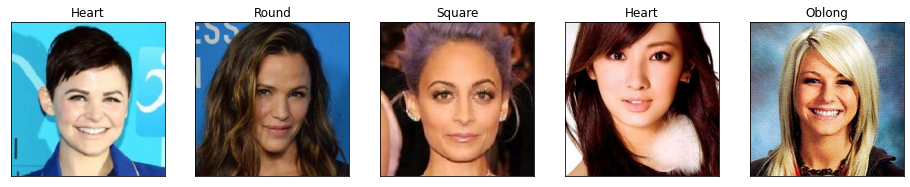

In [21]:
#Let's look at first 5 training data.

import matplotlib.pyplot as plt
 
fig = plt.figure(figsize = (16,9))
for i in range(5):
    ax = fig.add_subplot(1,5,i+1,xticks=[],yticks=[])
    ax.imshow((X[i].astype(np.uint8)))
    plt.title(folders[y[i]])

In [22]:
# Let's resize or rescale training data
X = X.astype('float32')/255
 
# Let's confirm the number of classes :) 
no_of_classes = len(np.unique(y))
no_of_classes

5

In [23]:
y

array([3, 1, 4, ..., 1, 2, 2])

In [24]:
from keras.utils import np_utils

# let's converts a class vector (integers) to binary class matrix.
y = np.array(np_utils.to_categorical(y,no_of_classes))
y[0]

array([0., 0., 0., 1., 0.], dtype=float32)

In [25]:
from sklearn.model_selection import train_test_split

# let's splite the data into subsets and explore their shapes !

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print('The test Data Shape ', X_test.shape[0])
 
X_test, X_valid, y_test, y_valid = train_test_split(X_test,y_test, test_size = 0.5)
print('The training Data Shape ', X_valid.shape[0])

The test Data Shape  980
The training Data Shape  490


In [85]:
print('The train Data Shape ', X_train.shape[1:])

The train Data Shape  (224, 224, 3)


In [86]:
from tensorflow.keras.layers import Activation
from keras.utils.generic_utils import get_custom_objects
import tensorflow.keras.backend as K

class Mish(Activation):
    '''
    Mish Activation Function.
    .. math::
        mish(x) = x * tanh(softplus(x)) = x * tanh(ln(1 + e^{x}))
    Shape:
        - Input: Arbitrary. Use the keyword argument `input_shape`
        (tuple of integers, does not include the samples axis)
        when using this layer as the first layer in a model.
        - Output: Same shape as the input.
    Examples:
        >>> X = Activation('Mish', name="conv1_act")(X_input)
    '''

    def __init__(self, activation, **kwargs):
        super(Mish, self).__init__(activation, **kwargs)
        self.__name__ = 'Mish'


def mish(x):
    return x*K.tanh(K.softplus(x))

get_custom_objects().update({'Mish': Mish(mish)})

In [173]:
from keras.models import Model
from keras.layers import Input
from keras.applications import InceptionResNetV2
from keras.preprocessing import image
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD, Adam
from keras.layers import Dropout, Dense, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

img_width, img_height = 224,224


input_tensor = Input(shape=(img_width, img_height,3))

base_model = InceptionResNetV2(weights='imagenet',
                                            include_top=False,
                                            input_shape=(img_width, img_height, 3),
                                            pooling='avg')


top_model = Sequential()
    
top_model.add(Dense(16, activation='Mish', input_shape=base_model.output_shape[1:]))
top_model.add(Dropout(0.75)) 

top_model.add(Dense(5, activation='softmax'))

model = Model(inputs=base_model.input, outputs=top_model(base_model.output))

In [174]:
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_1624 (Conv2D)            (None, 111, 111, 32) 864         input_18[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1624 (Batch (None, 111, 111, 32) 96          conv2d_1624[0][0]                
__________________________________________________________________________________________________
activation_1624 (Activation)    (None, 111, 111, 32) 0           batch_normalization_1624[0][0]   
____________________________________________________________________________________________

In [175]:
optimizer=Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [176]:
import time
from keras.callbacks import ModelCheckpoint, EarlyStopping
 
# Time to train our model !
epochs = 50
batch_size=32
 
train_datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1,
        height_shift_range=0.1,  
        horizontal_flip=True)
 
test_datagen = ImageDataGenerator()
 
train_generator = train_datagen.flow(
    X_train,y_train,
    batch_size=batch_size)
 
validation_generator = test_datagen.flow(
    X_valid,y_valid,
    batch_size=batch_size)
 
checkpointer = ModelCheckpoint(filepath ="/content/sample_data/Inception_ResNet_v2.h5", save_best_only = True, verbose = 1)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy', patience = 3, verbose = 1, factor = 0.5, minlr = 0.00001)
EarlyStopping_rate = EarlyStopping(monitor='loss', patience=3)

start = time.time()


history=model.fit_generator(train_generator,
                            epochs=epochs,
                            validation_data = validation_generator,
                            verbose=1,
                            steps_per_epoch=len(X_train) // batch_size,
                            callbacks=[checkpointer, learning_rate_reduction, EarlyStopping_rate])
 
end = time.time()
 
duration = end - start
print ('\n This Model took %0.2f seconds (%0.1f minutes) to train for %d epochs'%(duration, duration/60, epochs) )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
122/122 [==============================] - 93s 627ms/step - loss: 1.6073 - accuracy: 0.2599 - val_loss: 1.3896 - val_accuracy: 0.4020

Epoch 00001: val_loss improved from inf to 1.38955, saving model to /content/sample_data/Inception_ResNet_v2.h5
Epoch 2/50
122/122 [==============================] - 74s 601ms/step - loss: 1.2969 - accuracy: 0.4710 - val_loss: 1.2675 - val_accuracy: 0.5020

Epoch 00002: val_loss improved from 1.38955 to 1.26754, saving model to /content/sample_data/Inception_ResNet_v2.h5
Epoch 3/50
122/122 [==============================] - 73s 599ms/step - loss: 1.1001 - accuracy: 0.5820 - val_loss: 0.9092 - val_accuracy: 0.6796

Epoch 00003: val_loss improved from 1.26754 to 0.90918, saving model to /content/sample_data/Inception_ResNet_v2.h5
Epoch 4/50
122/122 [==============================] - 73s 598ms/step - loss: 0.9454 - accuracy: 0.6354 - val_loss: 0.9885 - val_accuracy: 0.6592

Epoch 00004: val_loss did not improve from 0.90918
Epoch 5/50
122/122 [=

In [178]:
(eval_loss, eval_accuracy) = model.evaluate(  
     X_test, y_test, batch_size=batch_size, verbose=2)
 
print("Accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("Loss: {}".format(eval_loss))

16/16 - 3s - loss: 0.6458 - accuracy: 0.8612
Accuracy: 86.12%
Loss: 0.645767331123352


In [179]:
(eval_loss, eval_accuracy) = model.evaluate(  
     X_train, y_train, batch_size=batch_size, verbose=2)

print(eval_accuracy)
print("Loss: {}".format(eval_loss))

123/123 - 22s - loss: 0.0143 - accuracy: 0.9992
0.999234676361084
Loss: 0.014259732328355312


In [180]:
(eval_loss, eval_accuracy) = model.evaluate(  
     X_valid, y_valid, batch_size=batch_size, verbose=3)

print(eval_accuracy)
print("Loss: {}".format(eval_loss))

0.8857142925262451
Loss: 0.47411295771598816


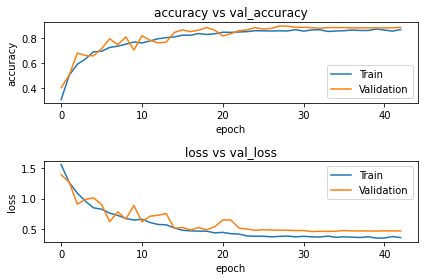

In [181]:
# Let's visualize the train/validation loss and accuracy wrt epochs

import matplotlib.pyplot as plt 
def plot(history):
    plt.figure(2)
    #plt.figure(figsize=(10,10)) 
 
     # summarize history for accuracy  
 
    plt.subplot(211)  
    plt.plot(history.history['accuracy'])  
    plt.plot(history.history['val_accuracy'])  
    plt.title('accuracy vs val_accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('epoch')  
    plt.legend(['Train', 'Validation'], loc='lower right')  
 
     # summarize history for loss  
 
    plt.subplot(212)  
    plt.plot(history.history['loss'])  
    plt.plot(history.history['val_loss'])  
    plt.title('loss vs val_loss')  
    plt.ylabel('loss')  
    plt.xlabel('epoch')  
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.tight_layout()
    plt.show()
 
# Finaly, let's call the plot function with the 'result' parameter 
 
plot(history)


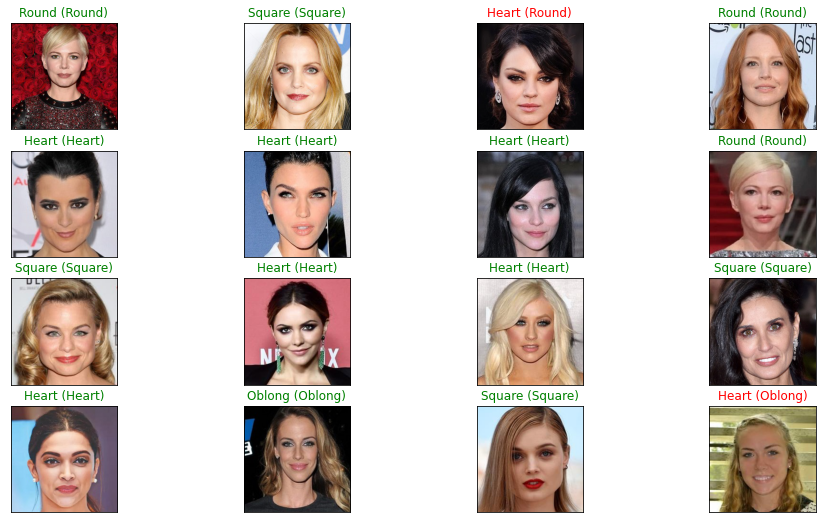

In [182]:
# Let's visualize some random test prediction.
def visualize_pred(y_pred):
# plot a random sample of test images, their predicted labels, and ground truth
    fig = plt.figure(figsize=(16, 9))
    for i, idx in enumerate(np.random.choice(X_test.shape[0], size=16, replace=False)):
        ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(X_test[idx]))
        pred_idx = np.argmax(y_pred[idx])
        true_idx = np.argmax(y_test[idx])
        ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                     color=("green" if pred_idx == true_idx else "red"))

visualize_pred(model.predict(X_test))

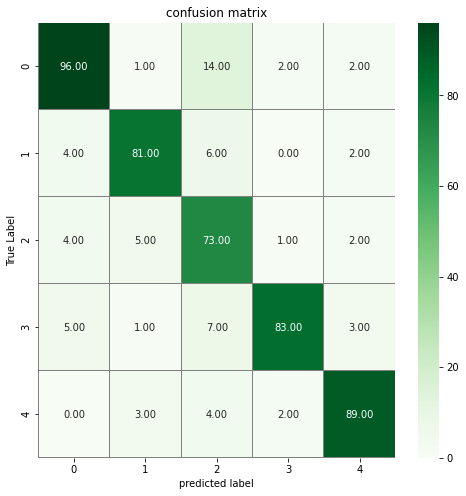

In [183]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)
confusion_mtx = confusion_matrix(Y_true,Y_pred_classes)
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Greens",
            linecolor = "gray",fmt = ".2f",ax=ax
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()


In [184]:
target_names = ['Heart', 'Oblong', 'Oval', 'Round', 'Square', ]
print(classification_report(Y_true,Y_pred_classes, target_names=target_names))

              precision    recall  f1-score   support

       Heart       0.88      0.83      0.86       115
      Oblong       0.89      0.87      0.88        93
        Oval       0.70      0.86      0.77        85
       Round       0.94      0.84      0.89        99
      Square       0.91      0.91      0.91        98

    accuracy                           0.86       490
   macro avg       0.86      0.86      0.86       490
weighted avg       0.87      0.86      0.86       490



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


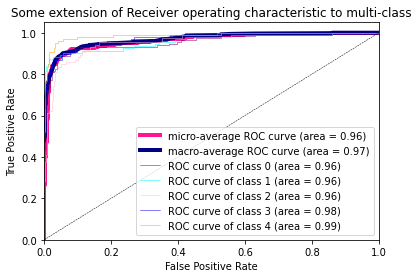

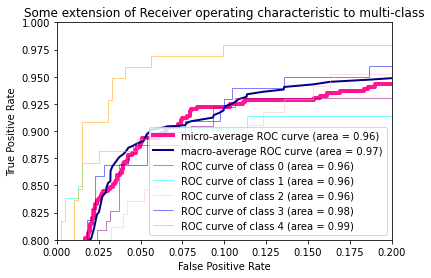

In [185]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle

n_classes = 5

from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 0.5

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), Y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle='solid', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle='solid', linewidth=4)

colors = cycle(['purple', 'cyan', 'pink', 'blue', 'orange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(5)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle='solid', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle='solid', linewidth=2)

colors = cycle(['purple', 'cyan', 'pink', 'blue', 'orange'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
